# Numpy Basics
## Array Declaration
Create a rank-1 vector
```python
x = np.array([1, 2, 3])
```

Check its shape
```python
x.shape
```

Declare a zero vector/matrix, which all elements are 0.
```python
x = np.zeros((2, 2))
# [0, 0]
# [0, 0]
```

Declare a one vector/matrix, which all elements are 1.
```python
x = np.ones((2, 2))
# [1, 1]
# [1, 1]
```

Create an identity matrix
```python
I = np.eyes(3)
# [1 0 0]
# [0 1 0]
# [0 0 1]
```

Create a random matrix, values are ranging from 0 to 1
```python
r = np.random.rand(3, 3)
```

Create a random matrix that is normally distributed
```python
r = np.random.randn(3, 3)
```

## Array Indexing
Declare an array and then slice the first two rows and columns 1 and 2
```python
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [1, 2, 3, 4],
              [5, 6, 7, 8]])
x_slice = x[:2, 1:3]
```

Slice of an array is a view into the same underlying data structure, thus modifying it will also modify the original.
```python
x[0, 1] # => 2
x_slice[0, 0] = 10
x[0, 1] # => 10
```

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array.
```python
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [1, 2, 3, 4],
              [5, 6, 7, 8]])
              
# Rank 1 view of the second row of x
row_rank_1 = x[1, :]

# Rank 2 view of the second row of x
row_rank_2 = x[1:2, :]
```

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric data types that you can use to construct arrays.
```python
x = np.array([1, 2])
x.dtype # => dtype('int64')

x = np.array([1.0, 2.0])
x.dtype # => dtype('float64')

# We can force a particular datatype
x = np.array([1.2, 2.3], dtype=np.int64)
x.dtype # => dtype('int64')
```

## Array Math
Declaring your numpy array, as float64
```python
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)
```

Element-wise sum
```python
x + y
```

Element-wise difference
```python
x - y
``` 

Element-wise product
```python
x * y
```

Element-wise division
```python
x / y
```

Element-wise square root
```python
np.sqrt(x)
```

Inner dot product of two vectors
```python
v = np.array([9, 10])
w = np.array([11, 12])
np.dot(v, w)
```

Matrix product of two 2D vectors, which are basically matrices
```python
v = np.array([[1, 2], [3, 4]])
w = np.array([[1, 0], [0, 1]])
np.dot(v, w)
```

Sum an array/vector along all axis
```python
np.sum(w)
```

Sum an array/vector along an axis
```python
np.sum(w, axis=0)
np.sum(w, axis=1)
```

Perform transpose of a matrix
```python
w.T
```

## Array Broadcasting
Suppose that we want to add a constant vector to each row of a matrix
```python
# We begin by doing it with the inefficient way...

x = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
v = np.array([1, 1, 1])

# Create an empty matrix that has x.shape, and then iterate throgh every row and perform addition
out = np.empty_like(x)
for i in range(3):
    y[i, :] = x[i, :] + v

# We can also consider stacking v together and perform matrix element-wise addition
vv = np.tile(v, (3, 1))
y = x + vv
```

However, there is an even better way in numpy! We can perform the stacking method without actually creating multiple copies of `v`.
```
y = x + v
```

In [2]:
import numpy as np

x = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
v = np.array([1, 1, 1])

# This is known as array broadcasting, which is essentially what we did with stacking.
x + v

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

## Image Operations
We need to shift gear a little bit and introduce `scipy`. Scientifc Python library provides some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images.

```python
from scipy.misc import imread, imsave, imresize

img = imread('assets/cat.jpg')
img_tinted = img * [1.0, 0.5, 0.9] # Through array broadcasting
img_tinted = imresize(img_tinted, (300, 300))
imsave('assets/cat_tinted.jpg', img_tinted)
```

## Plots
Plots are essential in machine learning, it helps us with understanding our data and monitoring the training progress of a model. Thus, `matplotlib` comes in handy! The most important function in `matplotlib` is `plot` which allows you to plot 2D data, but of course there are other types of plot functions. 

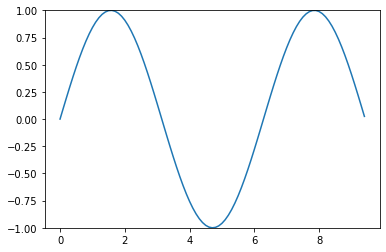

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

plt.ylim(-1, 1)
plt.plot(x, y)
plt.show()

With just a little bit of extra work, we can easily plot multiple lines at once. We can also add title, legend, and axis labels.

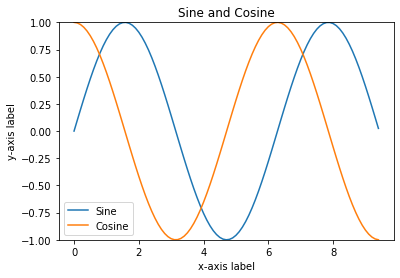

In [10]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.ylim(-1, 1)
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

You can plot different things in the same figure using the `subplot` function.

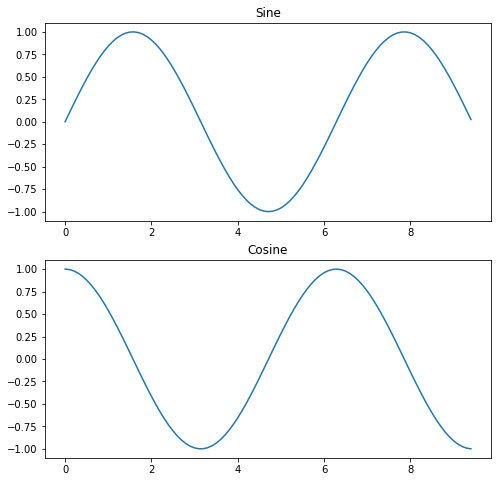

In [19]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid which has 2 rows and 1 column.
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(x, y_sin)
axs[0].set_title('Sine')
axs[1].plot(x, y_cos)
axs[1].set_title('Cosine')

plt.show()

We can also display images in `numpy`. A slight gotcha with imshow is that it only accepts `uint8` data type.
We need to explicitly cast the image to uint8 before displaying it.

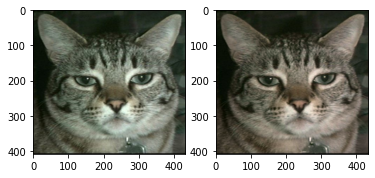

In [24]:
from matplotlib.image import imread

img = imread('assets/cat.jpg')
img_tinted = img * [1, 0.9, 0.9]

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(np.uint8(img_tinted))

plt.show()

Display multiple images on a grid.

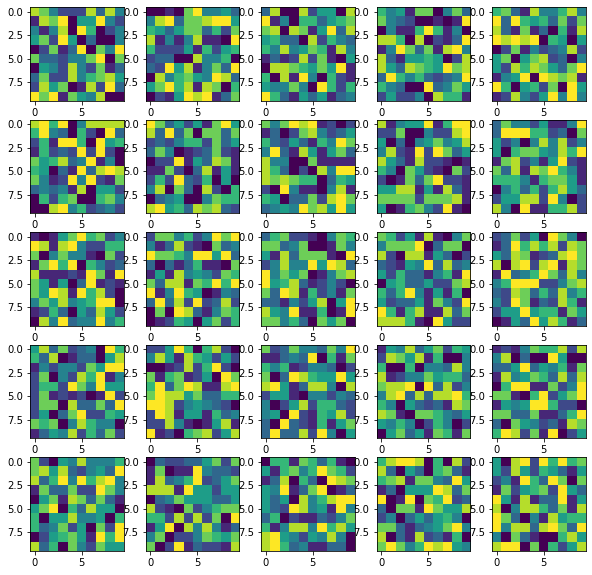

In [22]:
fig = plt.figure(figsize=(10, 10))

# 25 images, display them on a 5 by 5 grid
for i in range(1, 26):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(5, 5, i)
    plt.imshow(img)
    
plt.show()